# Spiral

> Enzo Sergiani

- Create a neural network to classify the two classes.
- Display the area of each class based on the code of Admission classification labwork.
- Challenge : Create a video of the training evolution (in this case, upload a zip file with the notebook and the video).


In [70]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix

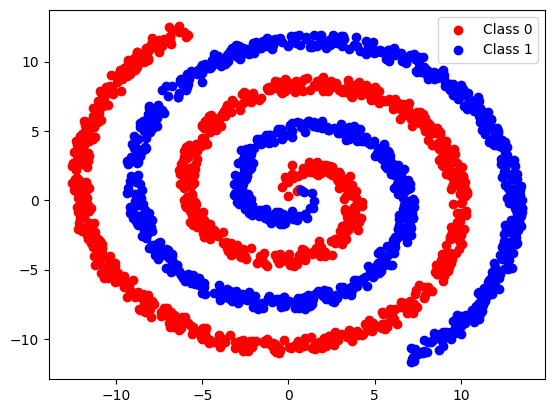

In [71]:
def generate_spiral_data(points, noise=1.0):
    n = np.sqrt(np.random.rand(points, 1)) * 780 * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + np.random.rand(points, 1) * noise
    d1y = np.sin(n) * n + np.random.rand(points, 1) * noise
    X1 = np.hstack((d1x, d1y))

    d2x = np.cos(n) * n + np.random.rand(points, 1) * noise
    d2y = -np.sin(n) * n + np.random.rand(points, 1) * noise
    X2 = np.hstack((d2x, d2y))

    X = np.vstack((X1, X2))
    y = np.hstack((np.zeros(points), np.ones(points)))

    return X, y


# Generate the data
X, y = generate_spiral_data(1000)

# Plot the data
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="red", label="Class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="Class 1")
plt.legend()
plt.show()

In [72]:
model = Sequential()
model.add(Dense(16, input_dim=2, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(
    optimizer=Adam(learning_rate=0.01), loss="binary_crossentropy", metrics=["accuracy"]
)

epochs = 70

history = model.fit(X, y, epochs=epochs, batch_size=32, verbose=1)

Epoch 1/70


/home/enzo/dev/artificial_intelligence/tp/.env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5780 - loss: 0.7139  
Epoch 2/70
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6418 - loss: 0.6418  
Epoch 3/70
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6497 - loss: 0.6347
Epoch 4/70
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6501 - loss: 0.6338  
Epoch 5/70
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6512 - loss: 0.6281  
Epoch 6/70
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6425 - loss: 0.6222
Epoch 7/70
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6274 - loss: 0.6196
Epoch 8/70
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5832 - loss: 0.6299  
Epoch 9/70
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5974 - loss: 0.5973
Epoch 10/70
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6562 - loss: 0.6024
Epoch 11/70
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5907 - loss: 0.6180
Epoch 12/70
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5972 - los

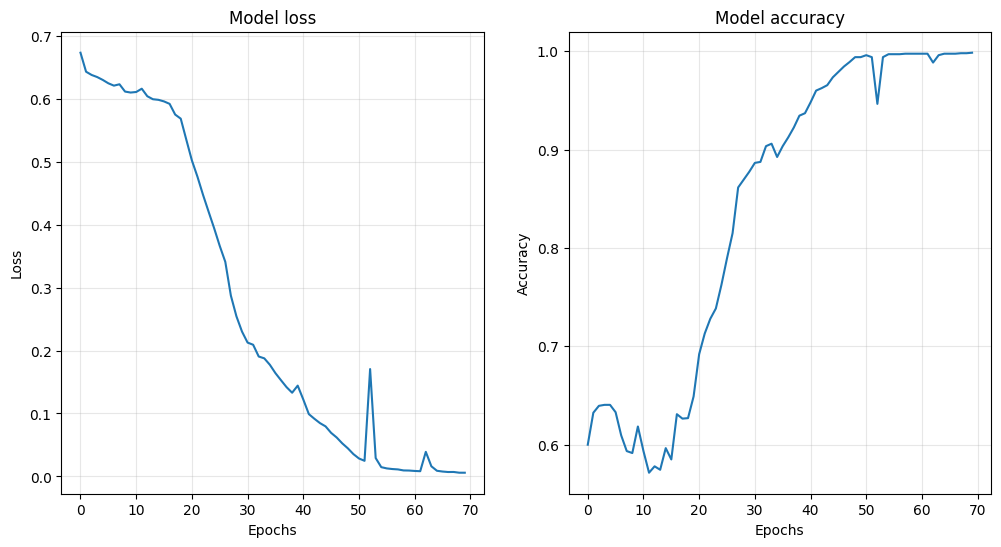

In [73]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=history.history["loss"])
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
sns.lineplot(data=history.history["accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True, alpha=0.3)

plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


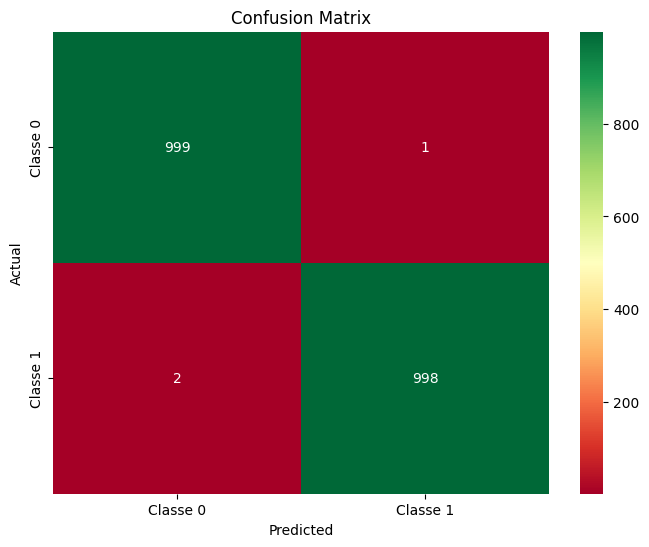

In [74]:
# Prédictions du modèle
y_pred = model.predict(X)
y_pred = (y_pred > 0.5).astype(int).flatten()

# Matrice de confusion
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="RdYlGn",
    xticklabels=["Classe 0", "Classe 1"],
    yticklabels=["Classe 0", "Classe 1"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

2318/2318 ━━━━━━━━━━━━━━━━━━━━ 1s 578us/step


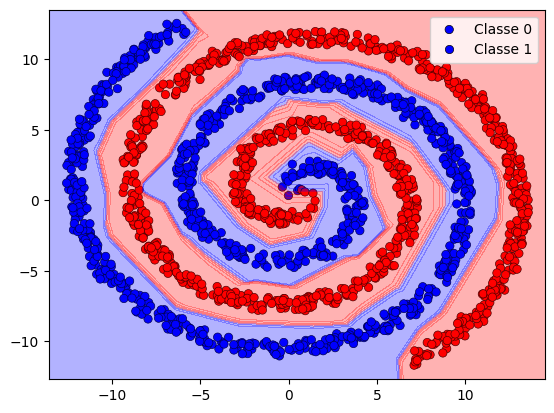

In [75]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    plot_step = 0.1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=y,
        edgecolor="k",
        marker="o",
        palette={0.0: "blue", 1.0: "red"},
    )

    plt.contourf(
        xx,
        yy,
        Z,
        alpha=0.3,
        cmap=ListedColormap(["blue", "red"]),
    )
    plt.legend(["Classe 0", "Classe 1"])
    plt.show()


plot_decision_boundary(model, X, y)

In [76]:
image_folder = "./screenshot/"
if not os.path.exists(image_folder):
    os.makedirs(image_folder)
os.system(f"rm -rf {image_folder}/*")

for epoch in range(1, epochs + 1):

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.lineplot(data=history.history["loss"][:epoch])
    plt.title("Model loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    sns.lineplot(data=history.history["accuracy"][:epoch])
    plt.title("Model accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.grid(True, alpha=0.3)

    plt.suptitle(f"Training Evolution - Epoch {epoch}")
    plt.savefig(os.path.join(image_folder, f"plot_epoch_{epoch}.png"))
    plt.close()


video_name = "training_evolution.mp4"
fps = 5

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
images.sort(key=lambda x: int(x.split("_")[2].split(".")[0]))

frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

fourcc = cv2.VideoWriter_fourcc(*"mp4v")
video = cv2.VideoWriter(video_name, fourcc, fps, (width, height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

video.release()